In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('./cwurData.csv')

In [10]:
print(data.shape)
data.head()

(2200, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [11]:
data.drop(columns=['world_rank', 'institution', 'country', 'national_rank', 'broad_impact', 'year'], inplace=True)

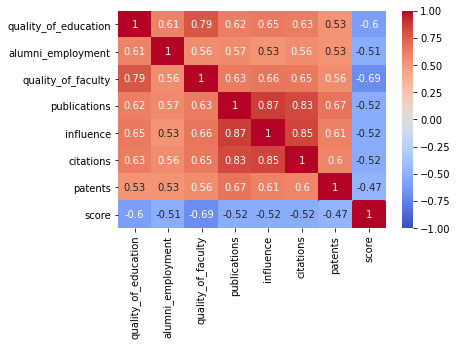

In [34]:
fig, ax = plt.subplots()
ax = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm')
fig.savefig('full_figure.pdf')

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


y = data['score']
X = data.drop(columns=['score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


numerical_features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents']
numerical_transforer = StandardScaler()

# categorical_features = ['country']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transforer, numerical_features)
        #,('cat', categorical_transformer, categorical_features)
        ])

pre = Pipeline(steps=[('preprocessor', preprocessor)])

#colNames = np.append(numerical_features, pd.get_dummies(X_train['country']).columns.values)

X_train = pd.DataFrame(pre.fit_transform(X_train), columns=numerical_features)
X_test = pd.DataFrame(pre.transform(X_test), columns=numerical_features)

In [13]:
X_train.shape

(1540, 7)

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
r = Ridge(alpha=2)
l = Lasso(alpha=2)
en = ElasticNet()
#svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [15]:
lr.fit(X_train, y_train)
r.fit(X_train, y_train)
l.fit(X_train, y_train)
en.fit(X_train, y_train)
#svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
from sklearn.metrics import r2_score

print('lr', r2_score(lr.predict(X_test), y_test))
print('r', r2_score(r.predict(X_test), y_test))
print('l', r2_score(l.predict(X_test), y_test))
print('en', r2_score(en.predict(X_test), y_test))
#print('svr', r2_score(svr.predict(X_test), y_test))
print('dtr', r2_score(dtr.predict(X_test), y_test))
print('rfr', r2_score(rfr.predict(X_test), y_test))

lr 0.11617885583450571
r 0.11515329474017633
l -1.392918316102576
en -0.51403468685199
dtr 0.9312119986235702
rfr 0.966498138811062


In [17]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfr)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

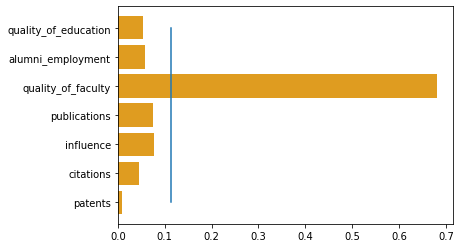

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax=sns.barplot(y=X_train.columns, x=rfr.feature_importances_, color='orange')
ax.plot(0.8*np.mean(rfr.feature_importances_)*np.ones(len(rfr.feature_importances_)), X_train.columns)
plt.show()

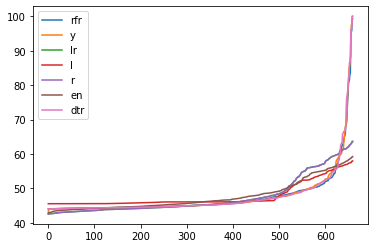

In [27]:
fig,ax = plt.subplots()
ax.plot(np.sort(rfr.predict(X_test)), label='rfr')
ax.plot(np.sort(y_test), label='y')
ax.plot(np.sort(lr.predict(X_test)), label='lr')
ax.plot(np.sort(l.predict(X_test)), label='l')
ax.plot(np.sort(r.predict(X_test)), label='r')
ax.plot(np.sort(en.predict(X_test)), label='en')
ax.plot(np.sort(dtr.predict(X_test)), label='dtr')
ax.legend()